# Twitter Crawler

In [10]:
import sys
!{sys.executable} -m pip install pymongo

    100% |████████████████████████████████| 348kB 2.9MB/s eta 0:00:01
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# Import Packages
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pymongo
import numpy as np
import pandas as pd
import csv
from datetime import datetime

In [2]:
# Target URL
url = "https://www.twitter.com/Nike"

In [3]:
# Using Chrome WebDriver
driver = webdriver.Chrome()
driver.get(url)
driver.maximize_window()

In [4]:
# Beautiful Soup scrolls down to the bottom of the page
lastHeight = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    newHeight = driver.execute_script("return document.body.scrollHeight")
    if newHeight == lastHeight:
        break
    lastHeight = newHeight

soupfetch = BeautifulSoup(driver.page_source, "html.parser")

In [22]:
# Open/Create a file to append data
csvFile = open('niketweets.csv', 'w+')
# Use csv Writer
csvWriter = csv.writer(csvFile)

In [23]:
# Initializing Parameters
tweet = []
hashtag = []
mentions = []
reply = []
like = [] 
retweet = []
date = []
time = []

In [24]:
# Fetching Twitter Data
row_count = 0
twitterwebdata = soupfetch.find_all('div', {'class': 'content'})
for twitter_tweet in twitterwebdata:
    try:
        tweet = twitter_tweet.find('p', {'class': 'TweetTextSize'}).text
        print(tweet)
    except:
        pass
    
    hashtag = []
    for tag in twitter_tweet.find_all('a', {'class': 'twitter-hashtag'}):
        hashtag.append(tag.text[1:])
    if hashtag == []:
        hashtag = np.NaN
    #print(hashtag)
    
    mentions = []
    for a in twitter_tweet.find_all('a', {'class': 'twitter-atreply'}):
        try:
            mentions.append(a['href'][1:])
        except:
            pass
    if mentions == []:
        mentions = np.NaN
    #print(mentions)
    
    thumbs = twitter_tweet.find_all('span', \
                        {'class': 'ProfileTweet-actionCountForPresentation'})
    try:
        reply = thumbs[0].text
        if reply[-1] == 'K':
            reply = int(float(reply[:-1]) * 1000)
        else:
            reply = int(float(reply.encode))
    except:
        pass
    #print(re)
    
    try:
        like = thumbs[3].text
        if like[-1] == 'K':
            like = int(float(like[:-1])*1000)
        else:
            like = int(float(like))
    except:
        pass
    #print(like)
    
    try:
        retweet = thumbs[2].text
        if retweet[-1] == 'K':
            retweet = int(float(retweet[:-1])*1000)
        else:
            retweet = int(float(retweet))
    except:
        pass
    #print(retweet)
    try:
        date = twitter_tweet.find("a",attrs={"class":"tweet-timestamp js-permalink js-nav js-tooltip"})["title"].split('-')[1]
    except:
        date = None
        pass
    
    try:
        time = twitter_tweet.find("a",attrs={"class":"tweet-timestamp js-permalink js-nav js-tooltip"})["title"].split('-')[0]
    except:
        time = None
        pass
    #print(time)
    #print(tweet, hashtag, mentions, reply, like, retweet, date, time)
    if all(attributes is not None for attributes in [tweet, date, time]):
        csvWriter.writerow([tweet, hashtag, mentions, reply, like, retweet, date, time])        

Don’t ask if your dreams are crazy. Ask if they’re crazy enough. #justdoitpic.twitter.com/Wd5L42egV8
He’s done it again. 

Never stop chasing your crazy dreams. #justdoitpic.twitter.com/sVXo12E1r9
Yesterday, 2:01:39 seemed crazy. Today, it’s the marathon world record. #justdoitpic.twitter.com/dm7JeOCPqN
Don't just be the fastest marathon runner in the world. Be the fastest in history. #justdoit @EliudKipchogepic.twitter.com/jGcoNy3Wsy
Yeah, that’s more like it. #justdoit
If you’re a girl from Compton, don’t just become a tennis player.
Dream of being the greatest athlete ever.
If you have only one hand, don’t just watch football, play it. At the highest level.
When they talk about the greatest team in the history of the sport, make sure it’s your team.
Believe in something, even if it means sacrificing everything.
Don’t become the best basketball player on the planet. Be bigger than basketball.
If you’re born a refugee, don’t let it stop you from playing soccer for the national team — 

A day has enough hours. You just have too many excuses.
Back to the blueprint. #airmaxhttps://amp.twimg.com/v/0449c772-b337-475b-9a4d-a020dc7382a4 …
There is no way to return the serve if you are not facing it. #serenareturns @serenawilliamspic.twitter.com/QVVYS7UjVT
Shopping your Instagram favorites just got easier. The Nike Women’s Instagram shop is here. http://gonike.me/6016FAxn pic.twitter.com/7HcrYPZgoL
You have to get good before you are good. #betterforitpic.twitter.com/pv7z19tzKt
Today is a starting block. Not a stumbling block. #justdoit
We all sweat in the same language. #womensday
Your body will thank you later. #justdoit
Today is up to you. #justdoit
The stars of tomorrow focus on today. #justdoit
Born in 1982. 3D printed in 2015. Introducing the first AF1 figurine, made with love at the #zoomcity bank. #nikeairhttps://amp.twimg.com/v/dcca00d3-daa3-4b64-a874-983f42aaf987 …
Above the rim. Beyond comparison. @ZachLaVine #NBAAllStarNYCpic.twitter.com/pkcAy5xxLd
A court fit fo

#justdoit RT @NikeFuel Summer means time for more.pic.twitter.com/zQfY4ym6Fo
Arrive early. Start fast. #futuregetsfasterpic.twitter.com/u8QlYRTLF9
Determination determines everything. #justdoit
Champion is the only label we'll remember.pic.twitter.com/t6VhYCc4Xc
No risk. No revenge. #riskeverythingpic.twitter.com/hjkwNLj0hW
If you are not ready to risk everything, there will be no revenge. Zlatan has spoken.https://amp.twimg.com/v/012951bf-8693-4c7d-86b2-2b3d843a9b4c …
Teach the world what your country taught you. #justdoitpic.twitter.com/3ZmKSVFMVK
Today a summer of risk starts. Zlatan is here to answer your questions. Go on, #AskZlatan.https://amp.twimg.com/v/461b5db6-6422-40e1-9f57-f2581e81fd07 …
Play every game like it's 'The Last Game.' #riskeverythinghttps://amp.twimg.com/v/b108fb9d-5d87-4041-8100-29025b60a61d …
There's no greater danger than playing it safe. http://gonike.me/6016ceQ2 
If you don't take risks, you'll always have regret. #justdoit
For the king of Paris, it’s an en

Resolutions aren’t supposed to be recycled.
The greatest resolutions are the ones you keep. http://nike.com/justdoit 
Want to continue helping today's kids get moving? Build on what you accomplished on 12.21 and visit http://www.designedtomove.org  to learn more.
It may be the darkest day of the year, but you still have 24 hours. Make it matter: http://gonike.me/1221 
Tomorrow, pledge your Nike+ activity to one of 10 programs that are helping to get kids active: http://gonike.me/1221 
Every mile counts on 12.21. Hit the road for a great cause and everyone wins. #flashrun http://gonike.me/1221 
On Saturday, our @NikeFuel counts more. I'm gettin after 7k. Join me, move for good: http://gonike.me/1221  #justdoit #teamnike
There's never enough time in the day, so let's make what you do on the longest night of the year matter more: http://gonike.me/1221 
If he never came back to the game.

He'd be a living legend.

But he wouldn't be @KobeBryant. #justdoit
http://youtu.be/ikC5GIpNFWw 
When 

# Analysis

In [51]:
# Loading Comma Seperated Data using read_table pandas function in 'nike_data' dataframe
nike_data = pd.read_table("niketweets.csv", sep=",", header=None)

In [52]:
# Adding Headers to Data
nike_data.columns = ["tweet", "hashtag", "mentions", "reply", "like", "retweet", "date", "time"]

In [53]:
nike_data

,tweet,hashtag,mentions,reply,like,retweet,date,time
0,Don’t ask if your dreams are crazy. Ask if the...,['justdoit'],NaN,16000.0,522000,228000,5 Sep 2018,10:09 AM
1,He’s done it again. \n\nNever stop chasing you...,['justdoit'],NaN,257.0,31000,6000,23 Sep 2018,5:55 PM
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",['justdoit'],NaN,214.0,29000,8900,16 Sep 2018,3:56 AM
3,Don't just be the fastest marathon runner in t...,['justdoit'],['EliudKipchoge'],104.0,6100,2600,15 Sep 2018,8:52 AM
4,"Yeah, that’s more like it. #justdoit",['justdoit'],NaN,1200.0,26000,5300,5 Sep 2018,10:14 AM
5,"If you’re a girl from Compton, don’t just beco...",NaN,NaN,310.0,19000,3600,5 Sep 2018,10:14 AM
6,"If you have only one hand, don’t just watch fo...",NaN,NaN,194.0,11000,2000,5 Sep 2018,10:14 AM
7,When they talk about the greatest team in the ...,NaN,NaN,168.0,11000,2400,5 Sep 2018,10:14 AM
8,"Believe in something, even if it means sacrifi...",NaN,NaN,1200.0,36000,17000,5 Sep 2018,10:14 AM
9,Don’t become the best basketball player on the...,NaN,NaN,84.0,12000,2500,5 Sep 2018,10:14 AM


In [54]:
nike_data['word_count'] = nike_data['tweet'].apply(lambda x: len(str(x).split(" ")))
nike_data[['tweet','word_count']]

,tweet,word_count
0,Don’t ask if your dreams are crazy. Ask if the...,13
1,He’s done it again. \n\nNever stop chasing you...,11
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",11
3,Don't just be the fastest marathon runner in t...,17
4,"Yeah, that’s more like it. #justdoit",6
5,"If you’re a girl from Compton, don’t just beco...",18
6,"If you have only one hand, don’t just watch fo...",16
7,When they talk about the greatest team in the ...,18
8,"Believe in something, even if it means sacrifi...",9
9,Don’t become the best basketball player on the...,13


In [55]:
nike_data['char_count'] = nike_data['tweet'].str.len() ## this also includes spaces
nike_data[['tweet','char_count']]

,tweet,char_count
0,Don’t ask if your dreams are crazy. Ask if the...,100
1,He’s done it again. \n\nNever stop chasing you...,95
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",107
3,Don't just be the fastest marathon runner in t...,133
4,"Yeah, that’s more like it. #justdoit",36
5,"If you’re a girl from Compton, don’t just beco...",107
6,"If you have only one hand, don’t just watch fo...",84
7,When they talk about the greatest team in the ...,93
8,"Believe in something, even if it means sacrifi...",62
9,Don’t become the best basketball player on the...,81


In [56]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

nike_data['avg_word'] = nike_data['tweet'].apply(lambda x: avg_word(x))
nike_data[['tweet','avg_word']]

,tweet,avg_word
0,Don’t ask if your dreams are crazy. Ask if the...,6.769231
1,He’s done it again. \n\nNever stop chasing you...,7.545455
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",8.818182
3,Don't just be the fastest marathon runner in t...,6.882353
4,"Yeah, that’s more like it. #justdoit",5.166667
5,"If you’re a girl from Compton, don’t just beco...",4.684211
6,"If you have only one hand, don’t just watch fo...",4.312500
7,When they talk about the greatest team in the ...,4.222222
8,"Believe in something, even if it means sacrifi...",6.000000
9,Don’t become the best basketball player on the...,5.307692


In [57]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package cess_cat is

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/akshaytambe/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/akshaytamb

True

In [58]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

nike_data['stopwords'] = nike_data['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
nike_data[['tweet','stopwords']]

,tweet,stopwords
0,Don’t ask if your dreams are crazy. Ask if the...,4
1,He’s done it again. \n\nNever stop chasing you...,2
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",1
3,Don't just be the fastest marathon runner in t...,7
4,"Yeah, that’s more like it. #justdoit",1
5,"If you’re a girl from Compton, don’t just beco...",7
6,"If you have only one hand, don’t just watch fo...",5
7,When they talk about the greatest team in the ...,8
8,"Believe in something, even if it means sacrifi...",3
9,Don’t become the best basketball player on the...,4


In [59]:
nike_data['hastags'] = nike_data['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
nike_data[['tweet','hastags']]

,tweet,hastags
0,Don’t ask if your dreams are crazy. Ask if the...,1
1,He’s done it again. \n\nNever stop chasing you...,1
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",1
3,Don't just be the fastest marathon runner in t...,1
4,"Yeah, that’s more like it. #justdoit",1
5,"If you’re a girl from Compton, don’t just beco...",0
6,"If you have only one hand, don’t just watch fo...",0
7,When they talk about the greatest team in the ...,0
8,"Believe in something, even if it means sacrifi...",0
9,Don’t become the best basketball player on the...,0


In [60]:
nike_data['numerics'] = nike_data['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
nike_data[['tweet','numerics']]

,tweet,numerics
0,Don’t ask if your dreams are crazy. Ask if the...,0
1,He’s done it again. \n\nNever stop chasing you...,0
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",0
3,Don't just be the fastest marathon runner in t...,0
4,"Yeah, that’s more like it. #justdoit",0
5,"If you’re a girl from Compton, don’t just beco...",0
6,"If you have only one hand, don’t just watch fo...",0
7,When they talk about the greatest team in the ...,0
8,"Believe in something, even if it means sacrifi...",0
9,Don’t become the best basketball player on the...,0


In [61]:
nike_data['upper'] = nike_data['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
nike_data[['tweet','upper']]

,tweet,upper
0,Don’t ask if your dreams are crazy. Ask if the...,0
1,He’s done it again. \n\nNever stop chasing you...,0
2,"Yesterday, 2:01:39 seemed crazy. Today, it’s t...",0
3,Don't just be the fastest marathon runner in t...,0
4,"Yeah, that’s more like it. #justdoit",0
5,"If you’re a girl from Compton, don’t just beco...",0
6,"If you have only one hand, don’t just watch fo...",0
7,When they talk about the greatest team in the ...,0
8,"Believe in something, even if it means sacrifi...",0
9,Don’t become the best basketball player on the...,0


In [62]:
nike_data['tweet'] = nike_data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
nike_data['tweet']

0      don’t ask if your dreams are crazy. ask if the...
1      he’s done it again. never stop chasing your cr...
2      yesterday, 2:01:39 seemed crazy. today, it’s t...
3      don't just be the fastest marathon runner in t...
4                   yeah, that’s more like it. #justdoit
5      if you’re a girl from compton, don’t just beco...
6      if you have only one hand, don’t just watch fo...
7      when they talk about the greatest team in the ...
8      believe in something, even if it means sacrifi...
9      don’t become the best basketball player on the...
10     if you’re born a refugee, don’t let it stop yo...
11     don’t believe you have to be like anybody to b...
12     lose 120 pounds and become an ironman, after b...
13     don’t settle for homecoming queen or linebacke...
14     don’t picture yourself wearing obj’s jersey. p...
15     don’t try to be the fastest runner in your sch...
16     believe in something, even if it means sacrifi...
17     it’s only a crazy dream 

In [63]:
nike_data['tweet'] = nike_data['tweet'].str.replace('[^\w\s]','')
nike_data['tweet']

0      dont ask if your dreams are crazy ask if theyr...
1      hes done it again never stop chasing your craz...
2      yesterday 20139 seemed crazy today its the mar...
3      dont just be the fastest marathon runner in th...
4                       yeah thats more like it justdoit
5      if youre a girl from compton dont just become ...
6      if you have only one hand dont just watch foot...
7      when they talk about the greatest team in the ...
8      believe in something even if it means sacrific...
9      dont become the best basketball player on the ...
10     if youre born a refugee dont let it stop you f...
11     dont believe you have to be like anybody to be...
12     lose 120 pounds and become an ironman after be...
13     dont settle for homecoming queen or linebacker...
14     dont picture yourself wearing objs jersey pict...
15     dont try to be the fastest runner in your scho...
16     believe in something even if it means sacrific...
17     its only a crazy dream u

In [64]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
nike_data['tweet'] = nike_data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nike_data['tweet']

0      dont ask dreams crazy ask theyre crazy enough ...
1      hes done never stop chasing crazy dreams justd...
2      yesterday 20139 seemed crazy today marathon wo...
3      dont fastest marathon runner world fastest his...
4                               yeah thats like justdoit
5      youre girl compton dont become tennis player d...
6        one hand dont watch football play highest level
7        talk greatest team history sport make sure team
8      believe something even means sacrificing every...
9      dont become best basketball player planet bigg...
10     youre born refugee dont let stop playing socce...
11                    dont believe like anybody somebody
12     lose 120 pounds become ironman beating brain t...
13               dont settle homecoming queen linebacker
14     dont picture wearing objs jersey picture obj w...
15     dont try fastest runner school fastest world f...
16     believe something even means sacrificing every...
17     crazy dream justdoit ser

In [65]:
freq = pd.Series(' '.join(nike_data['tweet']).split()).value_counts()[:10]
freq

justdoit    122
nike        121
new          49
get          44
one          39
dont         34
make         33
never        27
day          26
game         23
dtype: int64

In [66]:
freq = pd.Series(' '.join(nike_data['tweet']).split()).value_counts()[-10:]
freq

comebacks                                           1
lunar1                                              1
countonkobeid                                       1
championpictwittercom6kgsaswps3                     1
destined                                            1
flyprint                                            1
danger                                              1
httpwwwyoutubecomwatchvhmwmz10ftkofeatureyoutube    1
scared                                              1
jumpman23pictwittercom18nl7crgep                    1
dtype: int64

In [67]:
import sys
!{sys.executable} -m pip install textblob

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
from textblob import TextBlob
nike_data['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    dont ask dreams crazy ask there crazy enough j...
1    he done never stop chasing crazy dreams justdo...
2    yesterday 20139 seemed crazy today marathon wo...
3    dont fattest marathon runner world fattest his...
4                              yeah that like justdoit
Name: tweet, dtype: object

In [69]:
TextBlob(nike_data['tweet'][1]).words

WordList(['hes', 'done', 'never', 'stop', 'chasing', 'crazy', 'dreams', 'justdoitpictwittercomsvxo12e1r9'])

In [70]:
from textblob import Word
nike_data['tweet'] = nike_data['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
nike_data['tweet']

0      dont ask dream crazy ask theyre crazy enough j...
1      he done never stop chasing crazy dream justdoi...
2      yesterday 20139 seemed crazy today marathon wo...
3      dont fastest marathon runner world fastest his...
4                               yeah thats like justdoit
5      youre girl compton dont become tennis player d...
6        one hand dont watch football play highest level
7        talk greatest team history sport make sure team
8      believe something even mean sacrificing everyt...
9      dont become best basketball player planet bigg...
10     youre born refugee dont let stop playing socce...
11                    dont believe like anybody somebody
12     lose 120 pound become ironman beating brain tumor
13               dont settle homecoming queen linebacker
14     dont picture wearing objs jersey picture obj w...
15     dont try fastest runner school fastest world f...
16     believe something even mean sacrificing everyt...
17     crazy dream justdoit ser

In [71]:
TextBlob(nike_data['tweet'][0]).ngrams(2)

[WordList(['dont', 'ask']),
 WordList(['ask', 'dream']),
 WordList(['dream', 'crazy']),
 WordList(['crazy', 'ask']),
 WordList(['ask', 'theyre']),
 WordList(['theyre', 'crazy']),
 WordList(['crazy', 'enough']),
 WordList(['enough', 'justdoitpictwittercomwd5l42egv8'])]

In [72]:
tf1 = (nike_data['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,never,1
1,done,1
2,crazy,1
3,he,1
4,stop,1
5,dream,1
6,chasing,1
7,justdoitpictwittercomsvxo12e1r9,1


In [73]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(nike_data.shape[0]/(len(nike_data[nike_data['tweet'].str.contains(word)])))

tf1

,words,tf,idf
0,never,1,3.226844
1,done,1,5.241747
2,crazy,1,5.018603
3,he,1,1.672214
4,stop,1,3.536999
5,dream,1,3.919991
6,chasing,1,6.628041
7,justdoitpictwittercomsvxo12e1r9,1,6.628041


In [74]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,never,1,3.226844,3.226844
1,done,1,5.241747,5.241747
2,crazy,1,5.018603,5.018603
3,he,1,1.672214,1.672214
4,stop,1,3.536999,3.536999
5,dream,1,3.919991,3.919991
6,chasing,1,6.628041,6.628041
7,justdoitpictwittercomsvxo12e1r9,1,6.628041,6.628041


In [75]:
nike_data['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.39999999999999997, 0.7666666666666666)
1                                   (-0.6, 0.9)
2                                   (-0.6, 0.9)
3                                    (0.0, 0.0)
4                                    (0.0, 0.0)
Name: tweet, dtype: object

In [77]:
nike_data['sentiment'] = nike_data['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
nike_data[['tweet','sentiment']]

,tweet,sentiment
0,dont ask dream crazy ask theyre crazy enough j...,-0.400000
1,he done never stop chasing crazy dream justdoi...,-0.600000
2,yesterday 20139 seemed crazy today marathon wo...,-0.600000
3,dont fastest marathon runner world fastest his...,0.000000
4,yeah thats like justdoit,0.000000
5,youre girl compton dont become tennis player d...,1.000000
6,one hand dont watch football play highest level,0.000000
7,talk greatest team history sport make sure team,0.750000
8,believe something even mean sacrificing everyt...,-0.312500
9,dont become best basketball player planet bigg...,0.500000


In [83]:
nike_data.describe()

,reply,like,retweet,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment
count,750.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,179.165333,5668.841270,2911.838624,11.309524,94.912698,8.216398,3.108466,0.814815,0.091270,0.197090,0.100543
std,1835.323614,41786.282723,17139.802622,5.381298,39.741053,4.753470,2.541602,0.611235,0.354166,0.495855,0.265504
min,1.000000,1.000000,3.000000,1.000000,6.000000,1.333333,0.000000,0.000000,0.000000,0.000000,-0.625000
25%,12.000000,218.500000,194.750000,7.000000,65.750000,5.562500,1.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,759.500000,677.500000,11.000000,93.000000,7.125000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,78.000000,1900.000000,1600.000000,15.000000,125.000000,9.022727,4.250000,1.000000,0.000000,0.000000,0.166667
max,47000.000000,921000.000000,370000.000000,43.000000,298.000000,48.000000,19.000000,4.000000,4.000000,5.000000,1.000000


In [85]:
nike_data['date'].value_counts().head()

 5 May 2017     19
 5 Sep 2018     13
 1 Jan 2014      8
 1 Nov 2012      8
 17 Oct 2012     8
Name: date, dtype: int64

In [91]:
nike_data['date'] = pd.to_datetime(nike_data['date'])

In [123]:
yearly_stats = nike_data['date'].dt.year.value_counts()
yearly_stats

2014    206
2013    162
2012    110
2015     88
2016     74
2017     62
2018     54
Name: date, dtype: int64

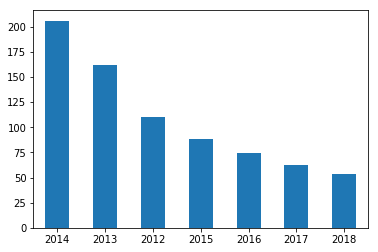

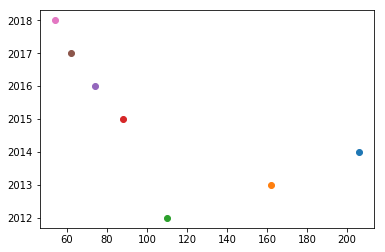

In [125]:
import pandas
from matplotlib import pyplot as plt

x, y = [], []
x.append (yearly_stats.keys().tolist())
y.append (yearly_stats.tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
plt.show()

In [126]:
monthly_stats = nike_data['date'].dt.month.value_counts()
monthly_stats

12    95
10    90
8     74
1     73
3     65
4     58
9     57
5     54
11    52
2     50
7     46
6     42
Name: date, dtype: int64

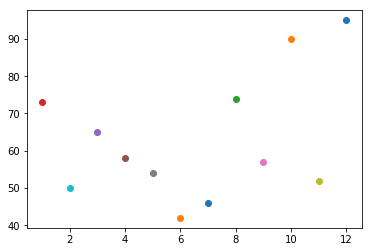

In [131]:
import pandas
from matplotlib import pyplot as plt

x, y = [], []
y.append (monthly_stats.keys().tolist())
x.append (monthly_stats.tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
plt.show()